In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Chargement des données
Chargement les différents jeux de données.
Préciser le nombre d'observations de chacun d'eux, la période étudiée, etc.

--- CH4 ---
Nombre d'observations : 499
Période : 1983 - 2025
   year  month   decimal  average  average_unc    trend  trend_unc
0  1983      7  1983.542  1625.96         2.19  1635.15       1.42
     year  month   decimal  average  average_unc    trend  trend_unc
498  2025      1  2025.042  1935.33        -9.99  1934.96      -9.99

--- CO2 ---
Nombre d'observations : 806
Période : 1958 - 2025
   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
     year  month  decimal date  average  deseasonalized  ndays  sdev   unc
805  2025      4     2025.2917   429.64          427.11     23  0.73  0.29

--- N2O ---
Nombre d'observations : 289
Période : 2001 - 2025
   year  month   decimal  average  average_unc   trend  trend_unc
0  2001      1  2001.042    316.3         0.15  316.03       0.15
     year  month   decimal  average  average_unc   trend  trend_unc
288  2025      1  2025.042   338.42        -

<Axes: ylabel='Frequency'>

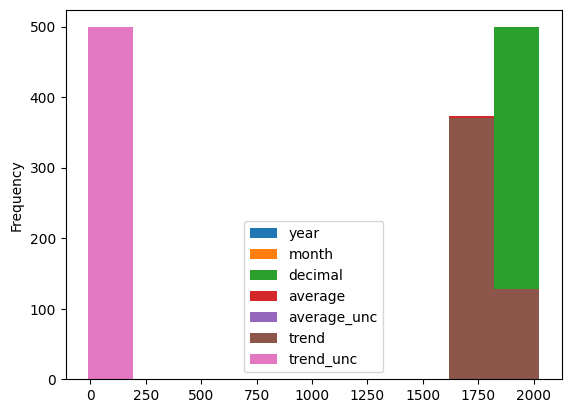

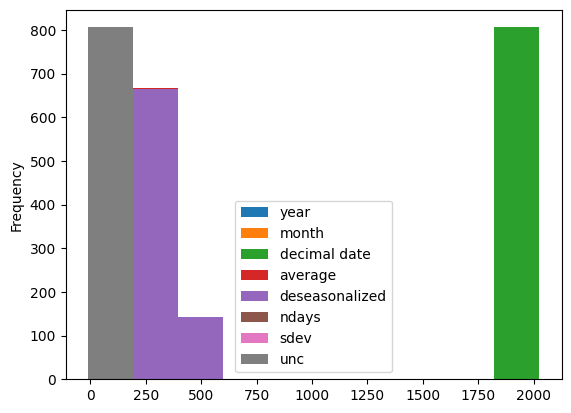

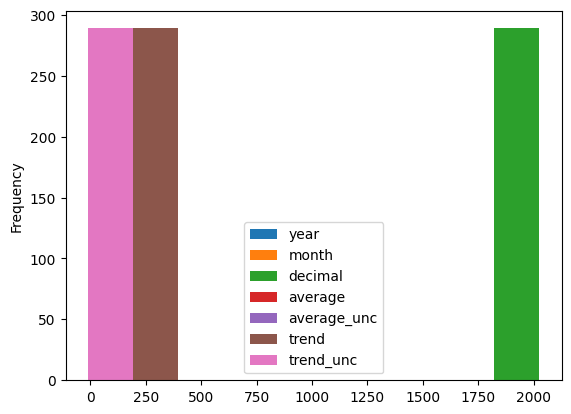

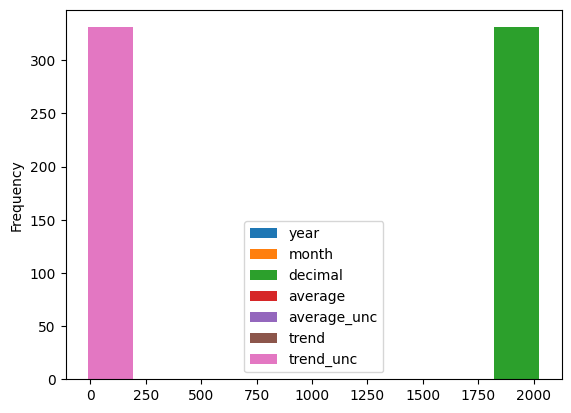

In [170]:
# Chargement des fichiers
ch4 = pd.read_csv("ch4_mm_gl.csv", comment="#")
co2 = pd.read_csv("co2_mm_mlo.csv", comment="#")
n2o = pd.read_csv("n2o_mm_gl.csv", comment="#")
sf6 = pd.read_csv("sf6_mm_gl.csv", comment="#")

# Affichage des infos clés
for name, df in zip(["CH4", "CO2", "N2O", "SF6"], [ch4, co2, n2o, sf6]):
    print(f"--- {name} ---")
    print(f"Nombre d'observations : {len(df)}")
    print(f"Période : {df['year'].min()} - {df['year'].max()}")
    print(df.head(1))
    print(df.tail(1))
    print()
ch4.plot.hist()
co2.plot.hist()
n2o.plot.hist()
sf6.plot.hist()

# 2. Sélection des données
Pour chaque jeu de données ne conserver que les variables “month“ et “average“. On supprimera donc les autres.

In [171]:
ch4 = ch4[["month", "average"]].copy()
co2 = co2[["month", "average"]].copy()
n2o = n2o[["month", "average"]].copy()
sf6 = sf6[["month", "average"]].copy()

# 3. Documentation
Se documenter puis présenter les différents gaz concernés par ces études : formule chimique, effets sur l'atmosphère, unité de mesure, etc

Dioxyde de carbone
Formule chimique: CO2
Effet sur l'atmosphère: gaz à effet de serre
Unité de mesure: ppm
Provenance: Combustion fossile
Durée de vie: 100 ans

Méthane
Formule chimique: CH4
Effet sur l'atmosphère: 25 fois plus puissant (en réchauffement) que le CO2
Unité de mesure: ppb
Provenance: Décomposition (agriculture/décharge/marais)
Durée de vie: 100 ans

Protoxyde d'azote
Formule chimique: N2O
Effet sur l'atmosphère: 300 fois plus puissant que le CO2
Unité de mesure: ppb
Provenance: Utilisation d'engrais, combustion de matière organique, etc.
Durée de vie: 120 ans

Hexafluorure de soufre
Formule chimique: SF6
Effet sur l'atmosphère: 23500 fois plus puissant que le CO2
Unité de mesure: ppt
Provenance: utilisé dans le matériel de transmission et de distribution de l'électricité
Durée de vie: supérieure à 3000 ans

# 4. Représentation par un nuage de points.
En abscisse on représentera l'indice des observations et en ordonnée la mesure du gaz en question. Interpréter les résultats obtenus.
Quels sont les deux gaz dont les émissions présentent clairement des variations saisonnières ?

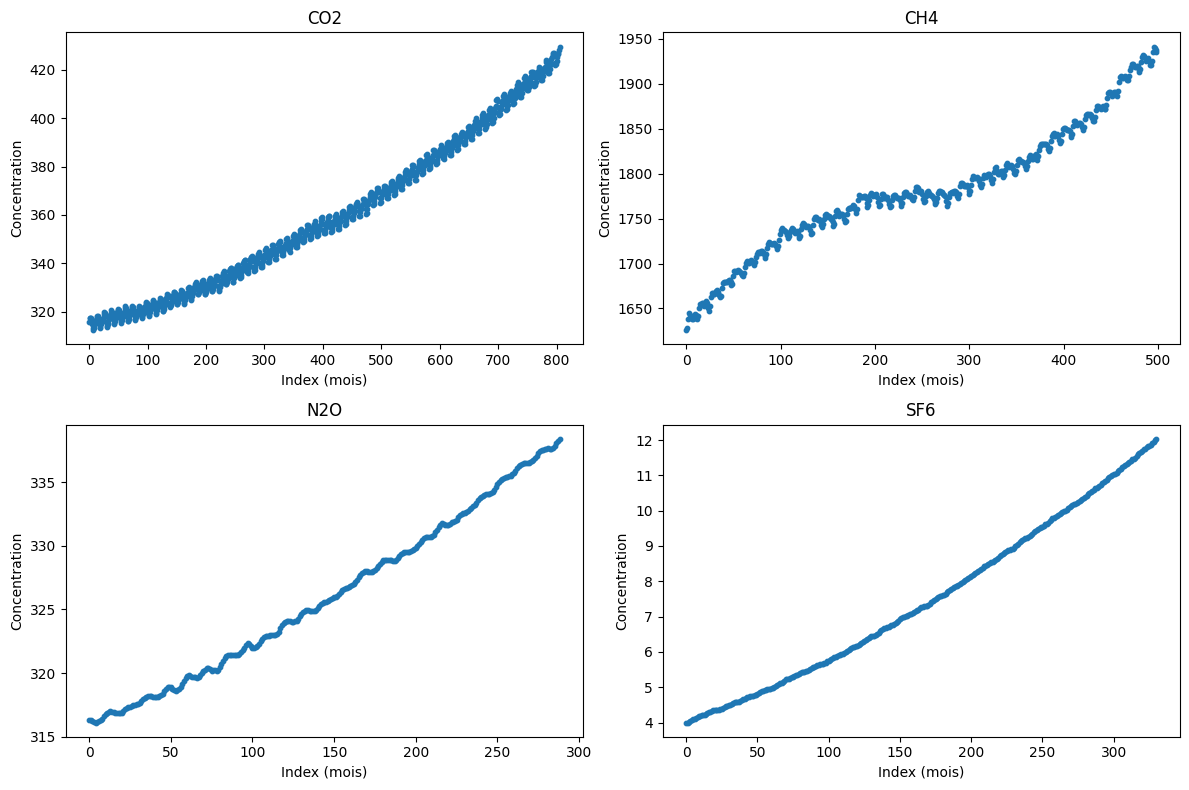

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
gaz_list = [co2, ch4, n2o, sf6]
titles = ["CO2", "CH4", "N2O", "SF6"]

for i, (df, title) in enumerate(zip(gaz_list, titles)):
    ax = axes[i//2, i%2]
    ax.scatter(df.index, df["average"], s=10)
    ax.set_title(title)
    ax.set_xlabel("Index (mois)")
    ax.set_ylabel("Concentration")

plt.tight_layout()
plt.show()

Le CO2 présente une variation saisonnière très forte,
On peut aussi en distinguer une plus modérée sur la courbe de CH4.
Les courbes de N2O et de SF6 ne présentent pas de saisonnalité distinguable.

# 5. Variations saisonnières
Pour les deux gaz dont les émissions présentent clairement des variations saisonnières, on désigne par t l'indice d'un mois et par xt la mesure correspondante. On va chercher à décomposer xt et l'écrire comme la somme de deux termes, le premier représentant la tendance de fond et le second les effets de la saisonnalité

## 5.1 Série lissée
Calculer pour chaque mois (quand c'est possible) une moyenne mobile d'ordre 6,
Calculer pour chaque mois d'indice t la quantité
xt*=(1/12)×((1/2)xt−6+xt−5+xt−4+xt−3+xt−2+xt−1+xt+xt+1+xt+2+xt+3+xt+4+xt+5+12xt+6)
Pour quels mois n'est-il pas possible de calculer cette quantité ? Pourquoi ?
Interpréter cette notion de moyenne mobile. Quel sens donner à cette nouvelle série constituée des xt* ? Pourquoi parle t-on en général de “série lissée“ à son sujet ?

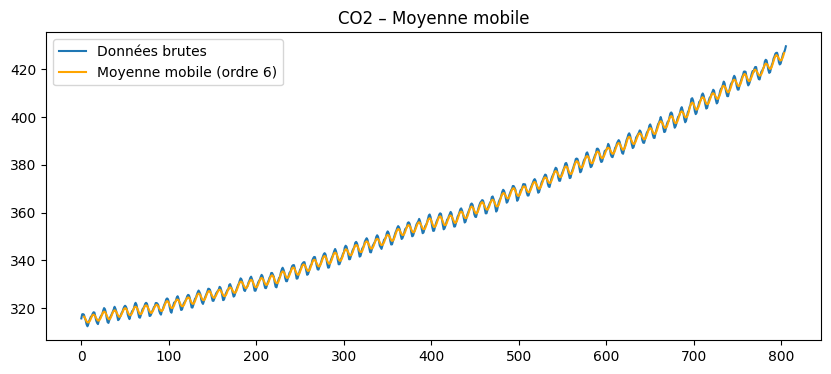

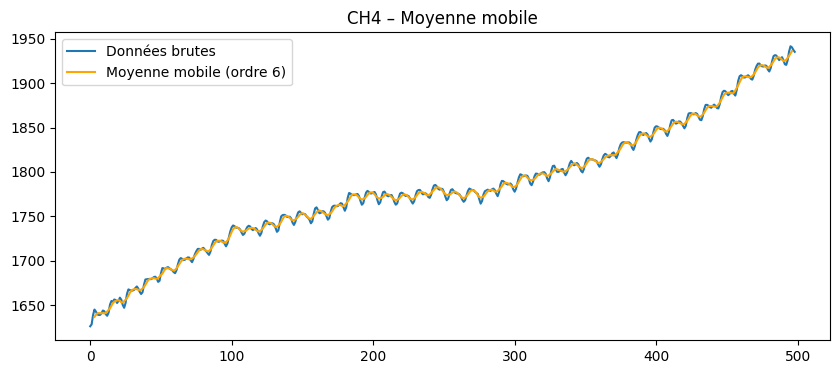

Index NaN CO2 : [0, 1, 2, 804, 805]
Index NaN CH4 : [0, 1, 2, 497, 498]


In [173]:
# Moyennes mobiles d'ordre 6
co2["série_lissée"] = co2["average"].rolling(window=6, center=True).mean()
ch4["série_lissée"] = ch4["average"].rolling(window=6, center=True).mean()

#Visualisation
#CO2
plt.figure(figsize=(10, 4))
plt.plot(co2["average"], label="Données brutes")
plt.plot(co2["série_lissée"], label="Moyenne mobile (ordre 6)", color='orange')
plt.title("CO2 – Moyenne mobile")
plt.legend()
plt.show()
#CH4
plt.figure(figsize=(10, 4))
plt.plot(ch4["average"], label="Données brutes")
plt.plot(ch4["série_lissée"], label="Moyenne mobile (ordre 6)", color='orange')
plt.title("CH4 – Moyenne mobile")
plt.legend()
plt.show()

#Problème
print("Index NaN CO2 :", co2[co2["série_lissée"].isna()].index.tolist())
print("Index NaN CH4 :", ch4[ch4["série_lissée"].isna()].index.tolist())

Cette série représente la tendance générale sans variations saisonnières ponctuelles.

On l’appelle série lissée car elle atténue les fluctuations courtes.

Certains mois ne sont pas calculés (NaN), parce qu’une moyenne d’ordre 6 nécessite 3 mois avant et 3 après, il est donc impossible de la caculer pour les premiers et derniers mois.

## 5.2 Série privée
Calculer la série privée de sa série lissée, i.e. St=xt−xt*. Comment interpréter cette nouvelle série ?

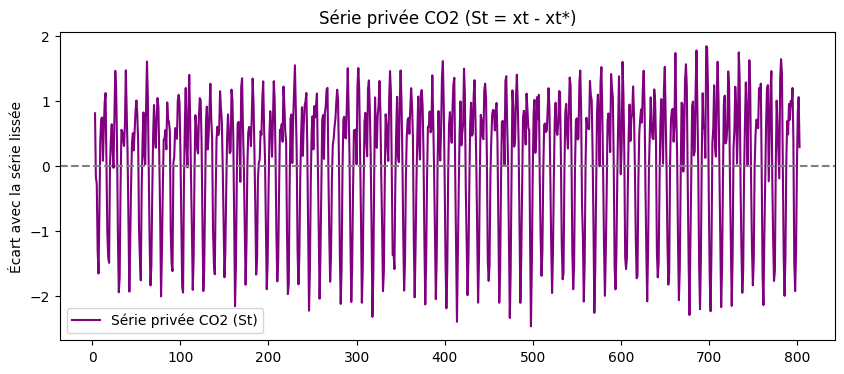

In [174]:
co2["St"] = co2["average"] - co2["série_lissée"]
ch4["St"] = ch4["average"] - ch4["série_lissée"]

#Visualisation
plt.figure(figsize=(10, 4))
plt.plot(co2["St"], label="Série privée CO2 (St)", color="purple")
plt.axhline(0, linestyle='--', color='gray')
plt.title("Série privée CO2 (St = xt - xt*)")
plt.ylabel("Écart avec la série lissée")
plt.legend()
plt.show()

On voit que l'écart est très faible (proche de 0), mais on ne discerne pas de régularité.

## 5.3 Coefficients mensuels
Calculer les 12 coefficients mensuels c1,c2,...,c12, il s'agit pour chacun d'eux de la moyenne des termes St correspondants au mois en question. Quel sens donner à ces coefficients ?

In [175]:
#Supprimer les NaN
co2_valid = co2.dropna(subset=["St"])
ch4_valid = ch4.dropna(subset=["St"])

#Calcul des coefficients mensuels
coeffs_co2 = co2_valid.groupby("month")["St"].mean()
coeffs_ch4 = ch4_valid.groupby("month")["St"].mean()

#Affichage
print("CO2 :", coeffs_co2)
print("CH4 :", coeffs_ch4)

CO2 : month
1     0.805423
2     0.477512
3     0.336237
4     0.954495
5     1.303838
6     0.980224
7     0.075075
8    -1.110274
9    -1.939154
10   -1.489104
11   -0.186716
12    0.630423
Name: St, dtype: float64
CH4 : month
1    -0.793537
2    -1.195407
3     0.135407
4     1.625203
5     1.233374
6    -2.032927
7    -5.220447
8    -3.177154
9     2.448130
10    5.297976
11    3.990437
12    1.383862
Name: St, dtype: float64


Ces moyennes permettent de discerner plus facilement les tendances saisonnières.
Pour le CO2, on voit qu'aout, septembre, octobre et novembre sont sous la tendance.
Pour CH4, on voit des pics en juillet(-5) et en octobre(+5).

## 5.4 Coefficients mensuels corrigés
Calculer les 12 coefficients mensuels corrigés : c′j=cj−c¯ où c¯ désigne la moyenne des 12 coefficients mensuels. Interpréter.

In [176]:
#Moyenne des 12 coefficients mensuels
moyenne_coeffs_co2 = coeffs_co2.mean()
moyenne_coeffs_ch4 = coeffs_ch4.mean()

#Coefficients corrigés
coeffs_co2_corr = coeffs_co2 - moyenne_coeffs_co2
coeffs_ch4_corr = coeffs_ch4 - moyenne_coeffs_ch4

#Affichage
print("Coefficients mensuels corrigés - CO2 :\n", coeffs_co2_corr)
print("Coefficients mensuels corrigés - CH4 :\n", coeffs_ch4_corr)

Coefficients mensuels corrigés - CO2 :
 month
1     0.735591
2     0.407681
3     0.266406
4     0.884663
5     1.234007
6     0.910392
7     0.005243
8    -1.180105
9    -2.008986
10   -1.558936
11   -0.256548
12    0.560591
Name: St, dtype: float64
Coefficients mensuels corrigés - CH4 :
 month
1    -1.101446
2    -1.503316
3    -0.172503
4     1.317294
5     0.925464
6    -2.340837
7    -5.528357
8    -3.485064
9     2.140220
10    4.990066
11    3.682527
12    1.075952
Name: St, dtype: float64


La correction garantit que la saison moyenne sur une année est nulle.
Cela évite d’introduire un biais dans la tendance quand on soustrait les effets saisonniers.

## 5.5
Calculer la série corrigée des variations saisonnières : il s’agit de la série de données résultant des différences entre les données initiales et les coefficients mensuels corrigés correspondant. La représenter. Interpréter.

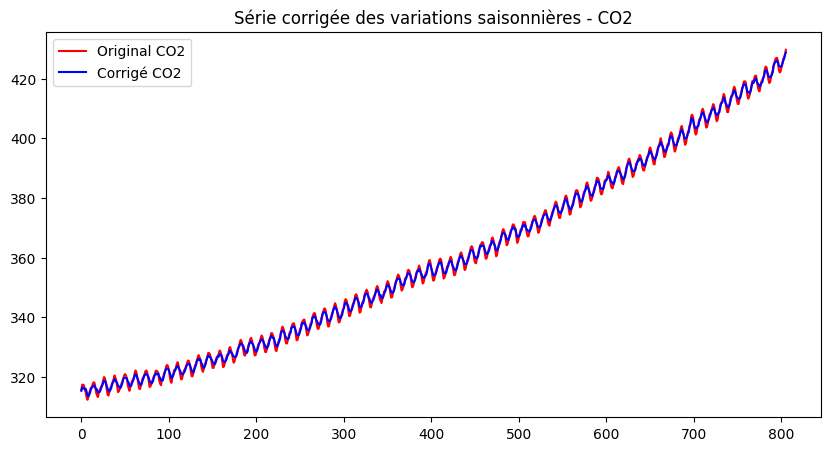

In [177]:
#Appliquer la correction
co2["corr_saison"] = co2["month"].map(coeffs_co2_corr)
ch4["corr_saison"] = ch4["month"].map(coeffs_ch4_corr)

#Série corrigée des variations saisonnières
co2["serie_corr"] = co2["average"] - co2["corr_saison"]
ch4["serie_corr"] = ch4["average"] - ch4["corr_saison"]

#Affichage
plt.figure(figsize=(10,5))
plt.plot(co2["average"], color='red', label='Original CO2')
plt.plot(co2["serie_corr"], color='blue', label='Corrigé CO2')
plt.title("Série corrigée des variations saisonnières - CO2")
plt.legend()
plt.show()

La courbe bleue montre la tendance réelle du gaz, sans les oscillations dues aux saisons.

## 5.6 Tendance linéaire
Calculer l’équation de la droite de régression de la série corrigée des variations saisonnières. La représenter.  Cette droite s’appelle “trend“ ou “tendance“. Interpréter cette notion.

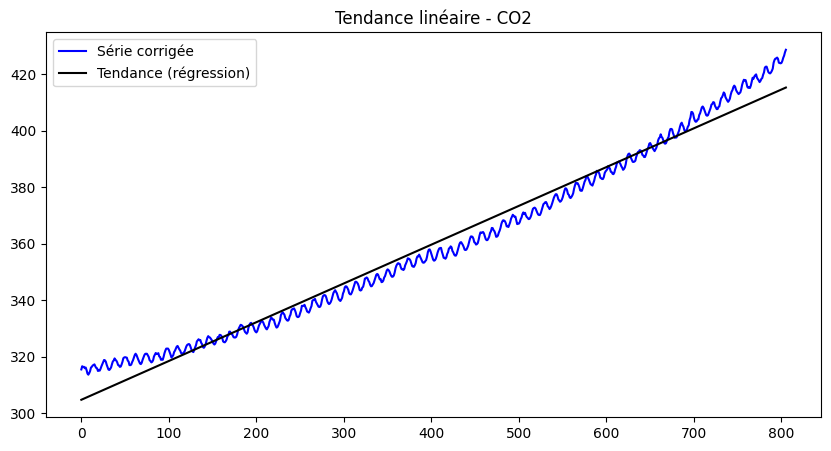

Tendance CO2 : y = 0.13749 * t + 304.68


In [178]:
from sklearn.linear_model import LinearRegression

#Création de l'index temporel t (ex: 0, 1, 2, ...)
t_co2 = np.arange(len(co2)).reshape(-1, 1)
serie_corr_co2 = co2["serie_corr"].values.reshape(-1, 1)

#Enlever les NaN (début/fin)
mask_valid = ~np.isnan(serie_corr_co2).flatten()
t_valid = t_co2[mask_valid]
y_valid = serie_corr_co2[mask_valid]

#Régression linéaire
model = LinearRegression()
model.fit(t_valid, y_valid)
trend = model.predict(t_co2)

#Ajout dans le DataFrame
co2["trend"] = trend

#Affichage
plt.figure(figsize=(10,5))
plt.plot(co2["serie_corr"], label="Série corrigée", color="blue")
plt.plot(co2["trend"], label="Tendance (régression)", color="black")
plt.title("Tendance linéaire - CO2")
plt.legend()
plt.show()

#Equation
print(f"Tendance CO2 : y = {model.coef_[0][0]:.5f} * t + {model.intercept_[0]:.2f}")

La droite représente la tendance, c'est-à-dire l'évolution moyenne.
Permettant d'estimer la progression dans le temps (long terme), en négligeant les effets saisonniers (court terme).
On obtient une augmentation moyenne par mois de 0.13749ppm, soit 1.65ppm par an

## 5.7
Effectuer des prévisions pour chacun des mois des deux prochaines années. Pour un mois donné il s’agit de la somme de la valeur de la tendance correspondante à ce mois et du coefficient mensuel corrigé. Interpréter cette méthode de prévision.

      t  month       trend  saison_corr    forecast
0   806      5  415.504869     1.234007  416.738876
1   807      6  415.642364     0.910392  416.552756
2   808      7  415.779859     0.005243  415.785102
3   809      8  415.917353    -1.180105  414.737248
4   810      9  416.054848    -2.008986  414.045862
5   811     10  416.192343    -1.558936  414.633407
6   812     11  416.329837    -0.256548  416.073290
7   813     12  416.467332     0.560591  417.027924
8   814      1  416.604827     0.735591  417.340418
9   815      2  416.742322     0.407681  417.150002
10  816      3  416.879816     0.266406  417.146222
11  817      4  417.017311     0.884663  417.901974


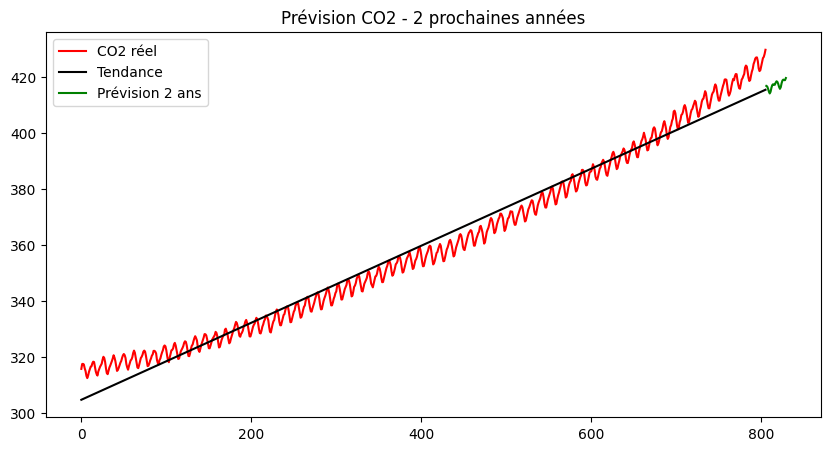

In [179]:
#Dernier indice temporel actuel
last_t = len(co2)
next_t = np.arange(last_t, last_t + 24).reshape(-1, 1)

#Prédiction de la tendance
predicted_trend = model.predict(next_t).flatten()

#Mois correspondants
future_months = [(m % 12) + 1 for m in range(co2["month"].iloc[-1], co2["month"].iloc[-1] + 24)]

#Coefficients saisonniers corrigés
season_corr = np.array([coeffs_co2_corr.get(m, 0) for m in future_months])

#Prévision finale
forecast = predicted_trend + season_corr

#DataFrame des prévisions
df_forecast = pd.DataFrame({
    "t": next_t.flatten(),
    "month": future_months,
    "trend": predicted_trend,
    "saison_corr": season_corr,
    "forecast": forecast
})

print(df_forecast.head(12))

#Visualisation
plt.figure(figsize=(10, 5))
plt.plot(co2["average"], label="CO2 réel", color="red")
plt.plot(co2["trend"], label="Tendance", color="black")
plt.plot(range(last_t, last_t + 24), forecast, label="Prévision 2 ans", color="green")
plt.title("Prévision CO2 - 2 prochaines années")
plt.legend()
plt.show()

Les prévisions suivent la tendance, auquel on ajoute les variations mensuelles.
Les résultats obtenus ne suivent pas directement le CO2 réel, la tendance étant une approximation globale, elle ne prend pas en compte les irrégularités.

## 5.8
A quoi peuvent être dues les variations saisonnières observées ?

Pour le CO2:
Printemps/été (hémisphère nord) : les plantes absorbent du CO₂ par photosynthèse, **baisse** des concentrations atmosphériques.

Automne/hiver les végétaux meurent, la décomposition relâche du CO₂, **hausse** des concentrations.

Pour le CH4 (méthane) :
Plus complexe, mais lié à :
* Activité bactérienne dans les sols, rizières, zones humides
* Variations de température et humidité
* Oxydation par OH dans l’atmosphère (qui varie selon la saison)

Le méthane a aussi un cycle saisonnier, mais moins régulier que celui du CO₂.

# 6.
On va maintenant chercher à décomposer xt en l'écrivant comme le produit de deux termes, le premier représentant la tendance de fond et le second les effets de la saisonnalité :

## 6.1
On définit la série lissée de la même façon que précédemment.

voir **5.1**

## 6.2
Calculer la série divisée par sa série lissée, i.e. St=(Xt)/(Xt*).

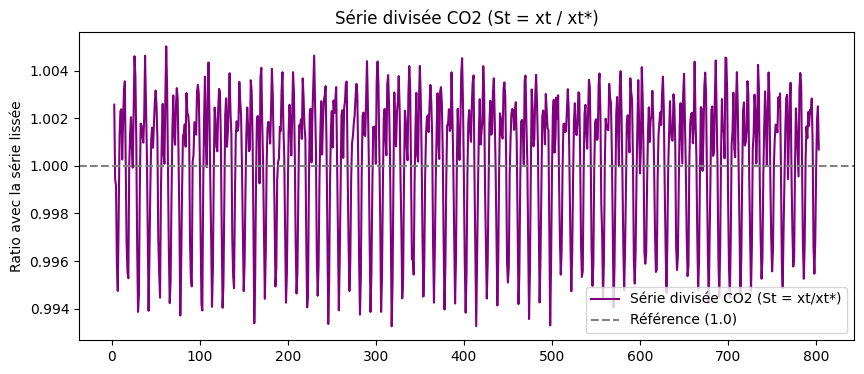

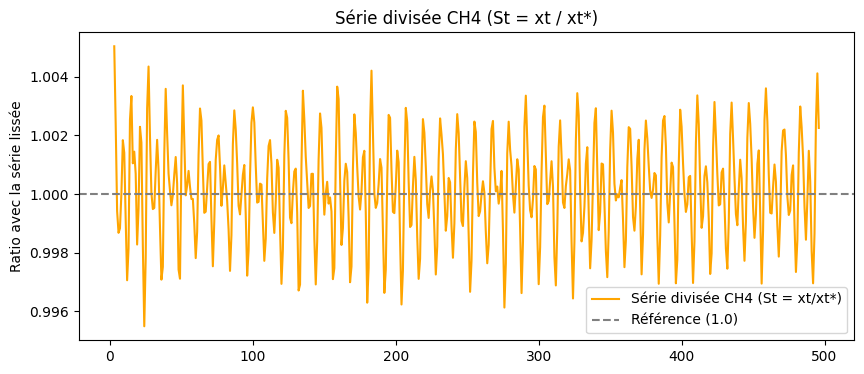

In [180]:
co2["St_mult"] = co2["average"] / co2["série_lissée"]
ch4["St_mult"] = ch4["average"] / ch4["série_lissée"]

#Affichage
plt.figure(figsize=(10, 4))
plt.plot(co2["St_mult"], label="Série divisée CO2 (St = xt/xt*)", color="purple")
plt.axhline(1, linestyle='--', color='gray', label='Référence (1.0)')
plt.title("Série divisée CO2 (St = xt / xt*)")
plt.ylabel("Ratio avec la série lissée")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(ch4["St_mult"], label="Série divisée CH4 (St = xt/xt*)", color="orange")
plt.axhline(1, linestyle='--', color='gray', label='Référence (1.0)')
plt.title("Série divisée CH4 (St = xt / xt*)")
plt.ylabel("Ratio avec la série lissée")
plt.legend()
plt.show()

Comment interpréter cette nouvelle série ?

Cette série montre de combien de % un mois s’écarte de la tendance.

## 6.3
Mêmes calculs des coefficients mensuels.

In [181]:
# Supprimer les NaN
co2_valid_mult = co2.dropna(subset=["St_mult"])
ch4_valid_mult = ch4.dropna(subset=["St_mult"])

# Calcul des coefficients mensuels (modèle multiplicatif)
coeffs_co2_mult = co2_valid_mult.groupby("month")["St_mult"].mean()
coeffs_ch4_mult = ch4_valid_mult.groupby("month")["St_mult"].mean()

# Affichage
print("Coefficients mensuels (multiplicatif) - CO2 :\n", coeffs_co2_mult)
print("\nCoefficients mensuels (multiplicatif) - CH4 :\n", coeffs_ch4_mult)

Coefficients mensuels (multiplicatif) - CO2 :
 month
1     1.002230
2     1.001316
3     1.000943
4     1.002647
5     1.003610
6     1.002716
7     1.000233
8     0.996928
9     0.994572
10    0.995802
11    0.999453
12    1.001746
Name: St_mult, dtype: float64

Coefficients mensuels (multiplicatif) - CH4 :
 month
1     0.999557
2     0.999333
3     1.000078
4     1.000914
5     1.000696
6     0.998862
7     0.997064
8     0.998207
9     1.001370
10    1.002978
11    1.002234
12    1.000772
Name: St_mult, dtype: float64


## 6.4
Calculer les 12 coefficients mensuels corrigés :
c′j=cj/c¯ où c¯ désigne la moyenne des 12 coefficients mensuels. Interpréter.

In [182]:
# Moyenne des 12 coefficients mensuels
moyenne_coeffs_co2_mult = coeffs_co2_mult.mean()
moyenne_coeffs_ch4_mult = coeffs_ch4_mult.mean()

# Coefficients corrigés (modèle multiplicatif)
coeffs_co2_corr_mult = coeffs_co2_mult / moyenne_coeffs_co2_mult
coeffs_ch4_corr_mult = coeffs_ch4_mult / moyenne_coeffs_ch4_mult

# Affichage
print("Coefficients mensuels corrigés (multiplicatif) - CO2 :\n", coeffs_co2_corr_mult)
print("\nCoefficients mensuels corrigés (multiplicatif) - CH4 :\n", coeffs_ch4_corr_mult)

# Vérification que la moyenne des coefficients corrigés est bien 1
print(f"\nMoyenne des coefficients corrigés CO2 : {coeffs_co2_corr_mult.mean():.6f}")
print(f"Moyenne des coefficients corrigés CH4 : {coeffs_ch4_corr_mult.mean():.6f}")

Coefficients mensuels corrigés (multiplicatif) - CO2 :
 month
1     1.002047
2     1.001133
3     1.000760
4     1.002464
5     1.003427
6     1.002533
7     1.000050
8     0.996745
9     0.994390
10    0.995620
11    0.999270
12    1.001563
Name: St_mult, dtype: float64

Coefficients mensuels corrigés (multiplicatif) - CH4 :
 month
1     0.999386
2     0.999161
3     0.999906
4     1.000742
5     1.000524
6     0.998690
7     0.996892
8     0.998035
9     1.001197
10    1.002806
11    1.002062
12    1.000600
Name: St_mult, dtype: float64

Moyenne des coefficients corrigés CO2 : 1.000000
Moyenne des coefficients corrigés CH4 : 1.000000


## 6.5
Calculer la série corrigée des variations saisonnières : il s’agit de la série de données résultant des quotients entre les données initiales et les coefficients mensuels corrigés correspondant. La représenter. Interpréter.

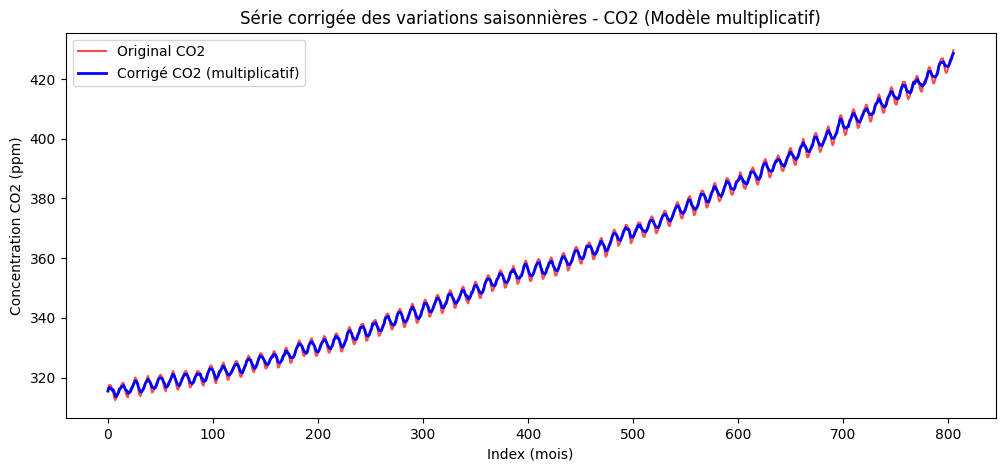

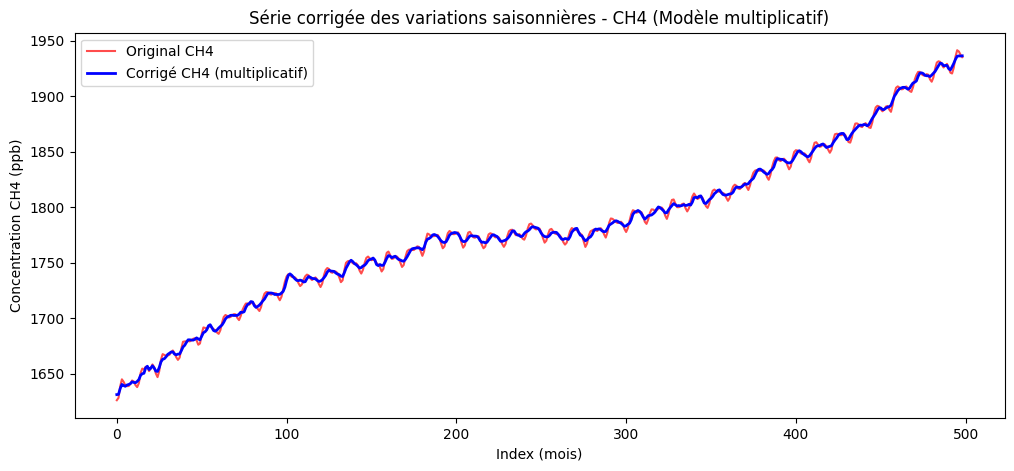

In [183]:
co2["corr_saison_mult"] = co2["month"].map(coeffs_co2_corr_mult)
ch4["corr_saison_mult"] = ch4["month"].map(coeffs_ch4_corr_mult)

#Série corrigée des variations saisonnières (modèle multiplicatif)
co2["serie_corr_mult"] = co2["average"] / co2["corr_saison_mult"]
ch4["serie_corr_mult"] = ch4["average"] / ch4["corr_saison_mult"]

#Affichage
plt.figure(figsize=(12, 5))
plt.plot(co2["average"], color='red', label='Original CO2', alpha=0.7)
plt.plot(co2["serie_corr_mult"], color='blue', label='Corrigé CO2 (multiplicatif)', linewidth=2)
plt.title("Série corrigée des variations saisonnières - CO2 (Modèle multiplicatif)")
plt.ylabel("Concentration CO2 (ppm)")
plt.xlabel("Index (mois)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(ch4["average"], color='red', label='Original CH4', alpha=0.7)
plt.plot(ch4["serie_corr_mult"], color='blue', label='Corrigé CH4 (multiplicatif)', linewidth=2)
plt.title("Série corrigée des variations saisonnières - CH4 (Modèle multiplicatif)")
plt.ylabel("Concentration CH4 (ppb)")
plt.xlabel("Index (mois)")
plt.legend()
plt.show()

## 6.6
Même calcul de la tendance que précédemment.

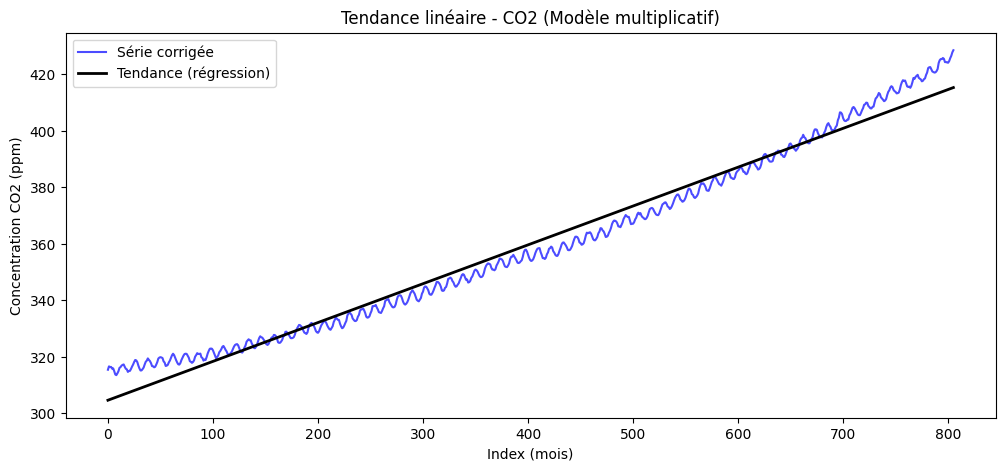

Tendance CO2 (multiplicatif) : y = 0.13749 * t + 304.68
Tendance CH4 (multiplicatif) : y = 0.47882 * t + 1662.65


In [184]:
#CO2
t_co2_mult = np.arange(len(co2)).reshape(-1, 1)
serie_corr_co2_mult = co2["serie_corr_mult"].values.reshape(-1, 1)
mask_valid_mult = ~np.isnan(serie_corr_co2_mult).flatten()
t_valid_mult = t_co2_mult[mask_valid_mult]
y_valid_mult = serie_corr_co2_mult[mask_valid_mult]
model_mult = LinearRegression()
model_mult.fit(t_valid_mult, y_valid_mult)
trend_mult = model_mult.predict(t_co2_mult)
co2["trend_mult"] = trend_mult

#CH4
t_ch4_mult = np.arange(len(ch4)).reshape(-1, 1)
serie_corr_ch4_mult = ch4["serie_corr_mult"].values.reshape(-1, 1)
mask_valid_ch4_mult = ~np.isnan(serie_corr_ch4_mult).flatten()
t_valid_ch4_mult = t_ch4_mult[mask_valid_ch4_mult]
y_valid_ch4_mult = serie_corr_ch4_mult[mask_valid_ch4_mult]
model_ch4_mult = LinearRegression()
model_ch4_mult.fit(t_valid_ch4_mult, y_valid_ch4_mult)
trend_ch4_mult = model_ch4_mult.predict(t_ch4_mult)
ch4["trend_mult"] = trend_ch4_mult

#Affichage
plt.figure(figsize=(12, 5))
plt.plot(co2["serie_corr_mult"], label="Série corrigée", color="blue", alpha=0.7)
plt.plot(co2["trend_mult"], label="Tendance (régression)", color="black", linewidth=2)
plt.title("Tendance linéaire - CO2 (Modèle multiplicatif)")
plt.ylabel("Concentration CO2 (ppm)")
plt.xlabel("Index (mois)")
plt.legend()
plt.show()

#Equations
print(f"Tendance CO2 (multiplicatif) : y = {model_mult.coef_[0][0]:.5f} * t + {model_mult.intercept_[0]:.2f}")
print(f"Tendance CH4 (multiplicatif) : y = {model_ch4_mult.coef_[0][0]:.5f} * t + {model_ch4_mult.intercept_[0]:.2f}")

## 6.7
Effectuer des prévisions pour chacun des mois des deux prochaines années. Pour un mois donné il s’agit du produit de la valeur de la tendance correspondante à ce mois et du coefficient mensuel corrigé. Interpréter cette méthode de prévision.

Prévisions CO2 (modèle multiplicatif) - 12 premiers mois :
      t  month       trend  saison_corr    forecast
0   806      5  415.501709     1.003427  416.925567
1   807      6  415.639202     1.002533  416.691973
2   808      7  415.776695     1.000050  415.797295
3   809      8  415.914187     0.996745  414.560463
4   810      9  416.051680     0.994390  413.717564
5   811     10  416.189173     0.995620  414.366144
6   812     11  416.326665     0.999270  416.022696
7   813     12  416.464158     1.001563  417.114935
8   814      1  416.601651     1.002047  417.454435
9   815      2  416.739144     1.001133  417.211157
10  816      3  416.876636     1.000760  417.193483
11  817      4  417.014129     1.002464  418.041565


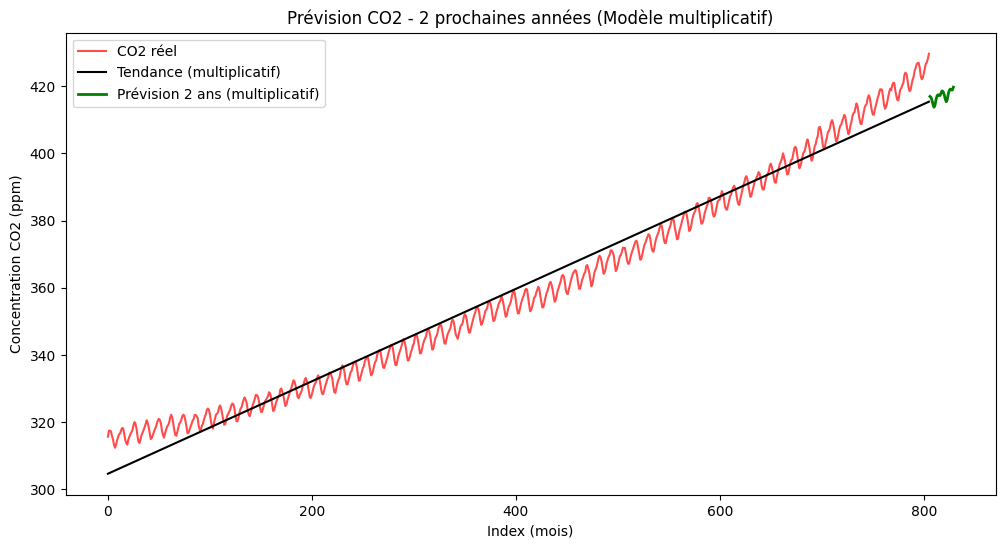

In [185]:
#Prévisions CO2 (modèle multiplicatif)
last_t_mult = len(co2)
next_t_mult = np.arange(last_t_mult, last_t_mult + 24).reshape(-1, 1)

#Prédiction de la tendance
predicted_trend_mult = model_mult.predict(next_t_mult).flatten()

#Mois correspondants
future_months_mult = [(m % 12) + 1 for m in range(co2["month"].iloc[-1], co2["month"].iloc[-1] + 24)]

#Coefficients saisonniers corrigés (multiplicatifs)
season_corr_mult = np.array([coeffs_co2_corr_mult.get(m, 1) for m in future_months_mult])

#Prévision finale (produit au lieu de somme)
forecast_mult = predicted_trend_mult * season_corr_mult

#DataFrame des prévisions
df_forecast_mult = pd.DataFrame({
    "t": next_t_mult.flatten(),
    "month": future_months_mult,
    "trend": predicted_trend_mult,
    "saison_corr": season_corr_mult,
    "forecast": forecast_mult
})

print("Prévisions CO2 (modèle multiplicatif) - 12 premiers mois :")
print(df_forecast_mult.head(12))

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(co2["average"], label="CO2 réel", color="red", alpha=0.7)
plt.plot(co2["trend_mult"], label="Tendance (multiplicatif)", color="black")
plt.plot(range(last_t_mult, last_t_mult + 24), forecast_mult, label="Prévision 2 ans (multiplicatif)", color="green", linewidth=2)
plt.title("Prévision CO2 - 2 prochaines années (Modèle multiplicatif)")
plt.ylabel("Concentration CO2 (ppm)")
plt.xlabel("Index (mois)")
plt.legend()
plt.show()

# 7. Comparer
Comparer les démarches des questions 5 et 6. Laquelle vous semble la plus pertinente dans notre contexte ?

# 8.
Pour les deux gaz dont les émissions ne présentent pas clairement des variations saisonnières, on va effectuer une régression linéaire :

## 8.1
Calculer le coefficient de corrélation.

In [186]:
from scipy.stats import pearsonr

# Créer l'index temporel pour N2O et SF6
n2o["t"] = np.arange(len(n2o))
sf6["t"] = np.arange(len(sf6))

# Coefficients de corrélation
corr_n2o, p_value_n2o = pearsonr(n2o["t"], n2o["average"])
corr_sf6, p_value_sf6 = pearsonr(sf6["t"], sf6["average"])

print(f"Coefficient de corrélation N2O : {corr_n2o:.6f} (p-value: {p_value_n2o:.2e})")
print(f"Coefficient de corrélation SF6 : {corr_sf6:.6f} (p-value: {p_value_sf6:.2e})")

Coefficient de corrélation N2O : 0.996566 (p-value: 1.43e-312)
Coefficient de corrélation SF6 : 0.995155 (p-value: 0.00e+00)


## 8.2
Déterminer l'équation de la droite de régression et la représenter par dessus le nuage de points.

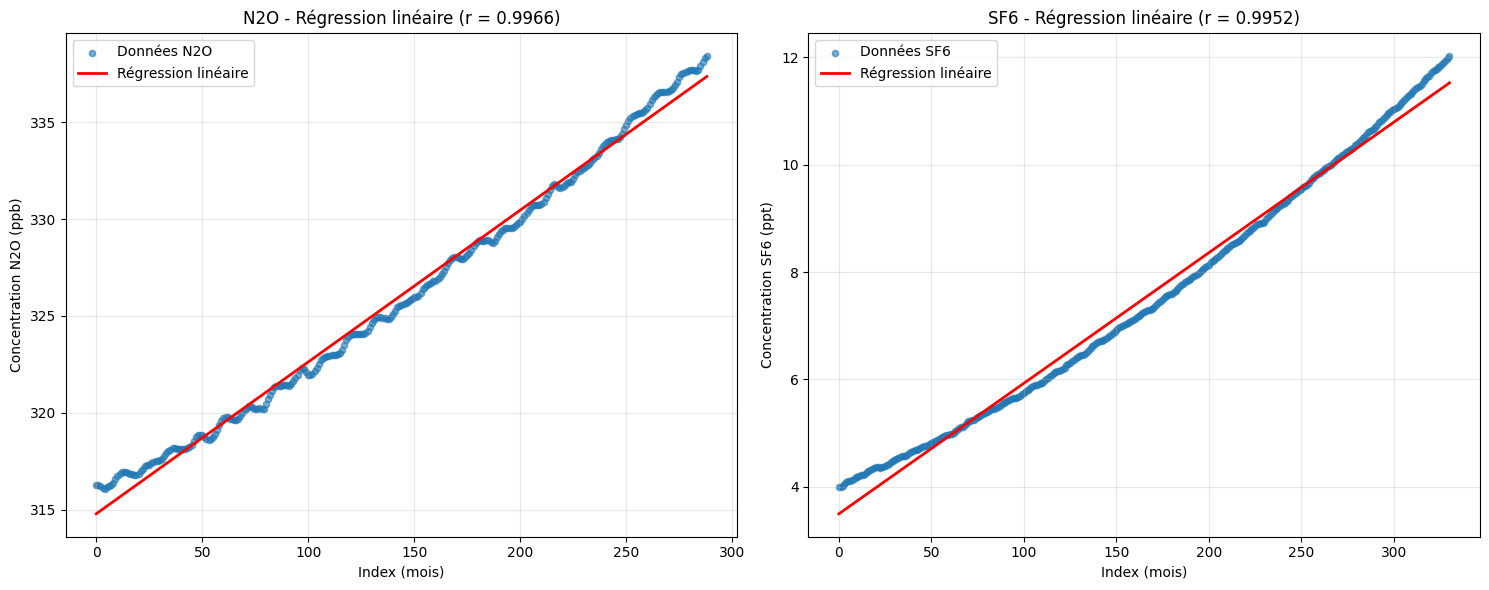

In [187]:
# Régression linéaire pour N2O
X_n2o = n2o["t"].values.reshape(-1, 1)
y_n2o = n2o["average"].values
model_n2o = LinearRegression()
model_n2o.fit(X_n2o, y_n2o)
pred_n2o = model_n2o.predict(X_n2o)

# Régression linéaire pour SF6
X_sf6 = sf6["t"].values.reshape(-1, 1)
y_sf6 = sf6["average"].values
model_sf6 = LinearRegression()
model_sf6.fit(X_sf6, y_sf6)
pred_sf6 = model_sf6.predict(X_sf6)

# Visualisation
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(n2o["t"], n2o["average"], alpha=0.6, s=20, label="Données N2O")
plt.plot(n2o["t"], pred_n2o, color="red", linewidth=2, label="Régression linéaire")
plt.title(f"N2O - Régression linéaire (r = {corr_n2o:.4f})")
plt.xlabel("Index (mois)")
plt.ylabel("Concentration N2O (ppb)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(sf6["t"], sf6["average"], alpha=0.6, s=20, label="Données SF6")
plt.plot(sf6["t"], pred_sf6, color="red", linewidth=2, label="Régression linéaire")
plt.title(f"SF6 - Régression linéaire (r = {corr_sf6:.4f})")
plt.xlabel("Index (mois)")
plt.ylabel("Concentration SF6 (ppt)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8.3
Effectuer des prévisions pour chacun des mois des deux prochaines années.

Prévisions N2O (modèle linéaire) - 12 premiers mois :
      t  forecast_linear
0   289       337.427354
1   290       337.505652
2   291       337.583950
3   292       337.662247
4   293       337.740545
5   294       337.818843
6   295       337.897141
7   296       337.975439
8   297       338.053737
9   298       338.132035
10  299       338.210333
11  300       338.288631

Prévisions SF6 (modèle linéaire) - 12 premiers mois :
      t  forecast_linear
0   331        11.548753
1   332        11.573081
2   333        11.597409
3   334        11.621738
4   335        11.646066
5   336        11.670394
6   337        11.694722
7   338        11.719050
8   339        11.743379
9   340        11.767707
10  341        11.792035
11  342        11.816363


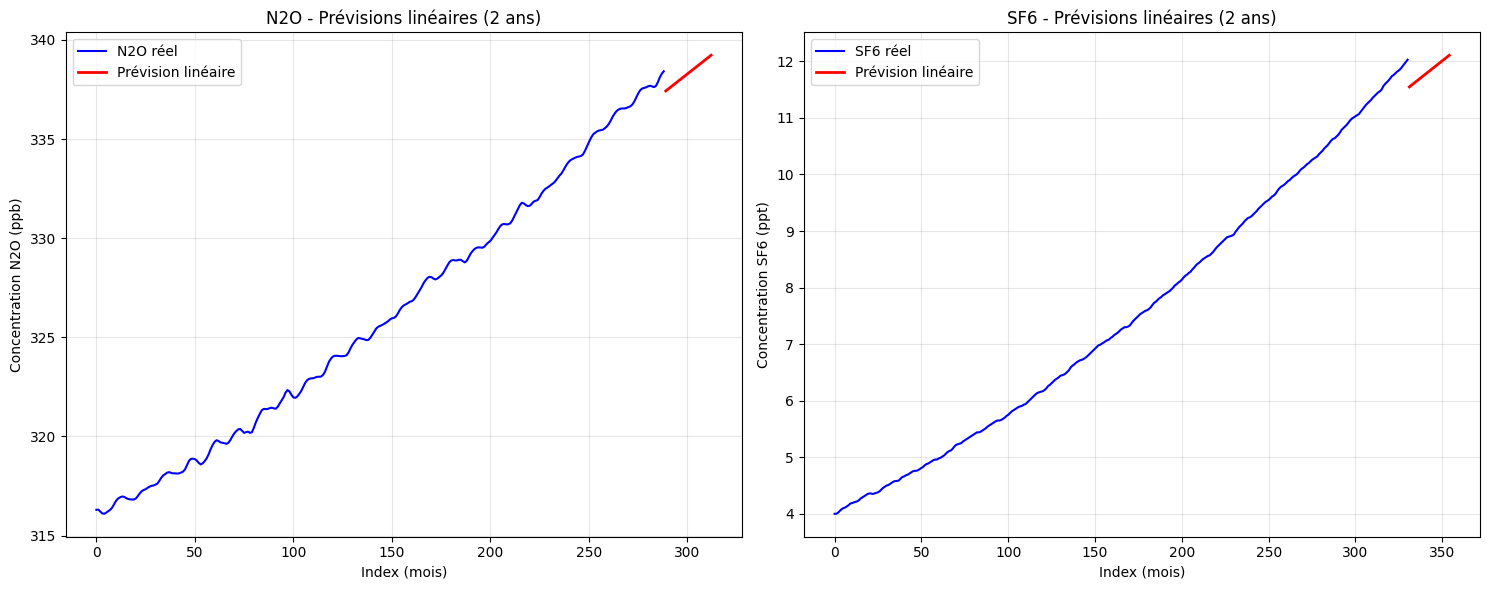

In [188]:
#Prévisions pour les 24 prochains mois
future_t_n2o = np.arange(len(n2o), len(n2o) + 24).reshape(-1, 1)
future_t_sf6 = np.arange(len(sf6), len(sf6) + 24).reshape(-1, 1)

forecast_n2o_linear = model_n2o.predict(future_t_n2o)
forecast_sf6_linear = model_sf6.predict(future_t_sf6)

#DataFrames des prévisions
df_forecast_n2o = pd.DataFrame({
    "t": future_t_n2o.flatten(),
    "forecast_linear": forecast_n2o_linear
})
df_forecast_sf6 = pd.DataFrame({
    "t": future_t_sf6.flatten(),
    "forecast_linear": forecast_sf6_linear
})

print("Prévisions N2O (modèle linéaire) - 12 premiers mois :")
print(df_forecast_n2o.head(12))
print("\nPrévisions SF6 (modèle linéaire) - 12 premiers mois :")
print(df_forecast_sf6.head(12))

#Visualisation
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(n2o["average"], label="N2O réel", color="blue")
plt.plot(range(len(n2o), len(n2o) + 24), forecast_n2o_linear,
         label="Prévision linéaire", color="red", linewidth=2)
plt.title("N2O - Prévisions linéaires (2 ans)")
plt.xlabel("Index (mois)")
plt.ylabel("Concentration N2O (ppb)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(sf6["average"], label="SF6 réel", color="blue")
plt.plot(range(len(sf6), len(sf6) + 24), forecast_sf6_linear,
         label="Prévision linéaire", color="red", linewidth=2)
plt.title("SF6 - Prévisions linéaires (2 ans)")
plt.xlabel("Index (mois)")
plt.ylabel("Concentration SF6 (ppt)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8.4
Reprendre les trois questions précédentes avec une régression exponentielle. Ce modèle est-il plus pertinent que le modèle linéaire ?

# 9.
Reprendre les deux gaz de la question 5, i.e. ceux dont les émissions présentent clairement des variations saisonnières, et pour chacun d'eux mener l'étude suivante :

## 9.1
Créer un nouveau dataset en agrégeant les valeurs de la variable "average" par année. Il comportera donc une variable "year".

In [189]:
# Recharger les données originales pour avoir les années
co2_original = pd.read_csv("co2_mm_mlo.csv", comment="#")
ch4_original = pd.read_csv("ch4_mm_gl.csv", comment="#")

# Agrégation par année
co2_annual = co2_original.groupby("year").agg({
    "average": "mean"
}).reset_index()

ch4_annual = ch4_original.groupby("year").agg({
    "average": "mean"
}).reset_index()

# Ajouter un index temporel
co2_annual["t"] = np.arange(len(co2_annual))
ch4_annual["t"] = np.arange(len(ch4_annual))

print("Dataset CO2 annuel :")
print(f"Nombre d'observations : {len(co2_annual)}")
print(f"Période : {co2_annual['year'].min()} - {co2_annual['year'].max()}")
print(co2_annual.head())

print("\nDataset CH4 annuel :")
print(f"Nombre d'observations : {len(ch4_annual)}")
print(f"Période : {ch4_annual['year'].min()} - {ch4_annual['year'].max()}")
print(ch4_annual.head())

Dataset CO2 annuel :
Nombre d'observations : 68
Période : 1958 - 2025
   year     average  t
0  1958  315.237000  0
1  1959  315.981667  1
2  1960  316.908333  2
3  1961  317.643333  3
4  1962  318.453333  4

Dataset CH4 annuel :
Nombre d'observations : 43
Période : 1983 - 2025
   year      average  t
0  1983  1636.556667  0
1  1984  1644.855000  1
2  1985  1657.370000  2
3  1986  1670.210833  3
4  1987  1682.804167  4


## 9.2
Construire un nuage de points avec en abscisse l'indice des observations et en ordonnée les émissions correspondantes.

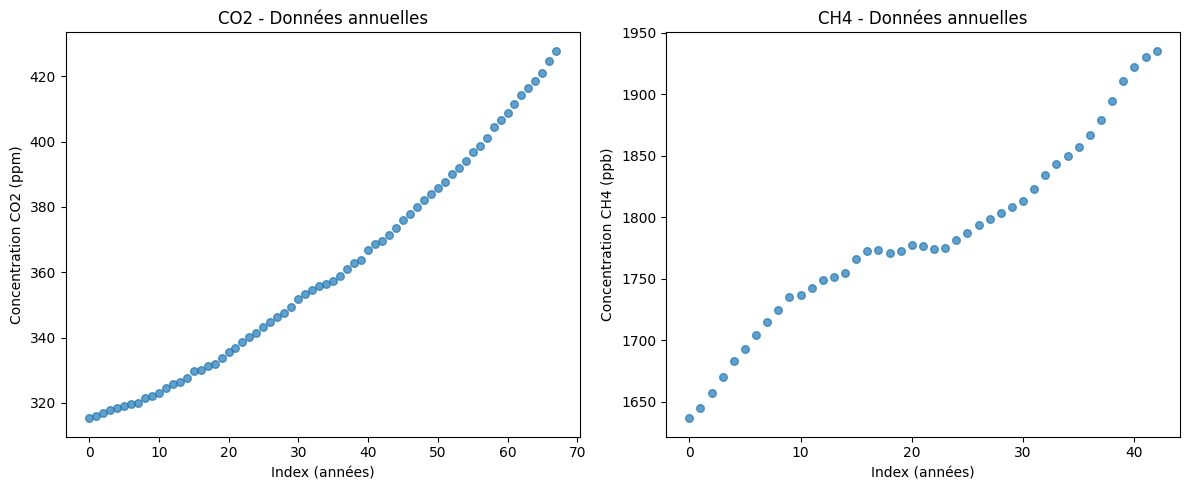

In [190]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(co2_annual["t"], co2_annual["average"], s=30, alpha=0.7)
ax1.set_title("CO2 - Données annuelles")
ax1.set_xlabel("Index (années)")
ax1.set_ylabel("Concentration CO2 (ppm)")

ax2.scatter(ch4_annual["t"], ch4_annual["average"], s=30, alpha=0.7)
ax2.set_title("CH4 - Données annuelles")
ax2.set_xlabel("Index (années)")
ax2.set_ylabel("Concentration CH4 (ppb)")

plt.tight_layout()
plt.show()

## 9.3
Calculer le coefficient de corrélation.

In [191]:
corr_co2_annual, _ = pearsonr(co2_annual["t"], co2_annual["average"])
corr_ch4_annual, _ = pearsonr(ch4_annual["t"], ch4_annual["average"])

print(f"Corrélation CO2 annuel : {corr_co2_annual:.6f}")
print(f"Corrélation CH4 annuel : {corr_ch4_annual:.6f}")

Corrélation CO2 annuel : 0.989677
Corrélation CH4 annuel : 0.974539


## 9.4
Déterminer l'équation de la droite de régression et la représenter par dessus le nuage de points.

CO2 annuel : y = 1.6588 * t + 305.01
CH4 annuel : y = 5.8752 * t + 1660.08


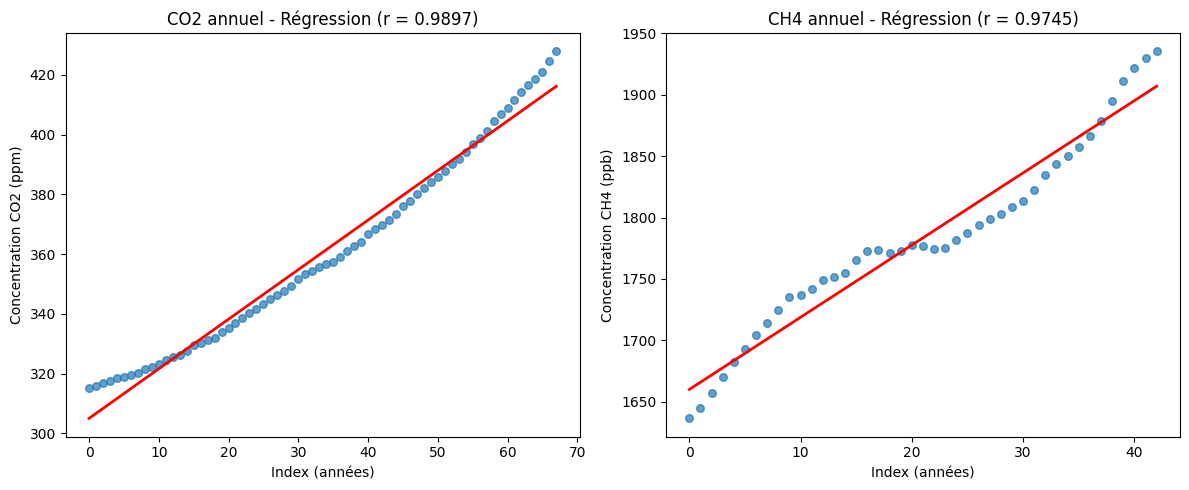

In [192]:
X_co2_annual = co2_annual["t"].values.reshape(-1, 1)
X_ch4_annual = ch4_annual["t"].values.reshape(-1, 1)

model_co2_annual = LinearRegression().fit(X_co2_annual, co2_annual["average"])
model_ch4_annual = LinearRegression().fit(X_ch4_annual, ch4_annual["average"])

pred_co2_annual = model_co2_annual.predict(X_co2_annual)
pred_ch4_annual = model_ch4_annual.predict(X_ch4_annual)

print(f"CO2 annuel : y = {model_co2_annual.coef_[0]:.4f} * t + {model_co2_annual.intercept_:.2f}")
print(f"CH4 annuel : y = {model_ch4_annual.coef_[0]:.4f} * t + {model_ch4_annual.intercept_:.2f}")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(co2_annual["t"], co2_annual["average"], s=30, alpha=0.7)
ax1.plot(co2_annual["t"], pred_co2_annual, 'r-', linewidth=2)
ax1.set_title(f"CO2 annuel - Régression (r = {corr_co2_annual:.4f})")
ax1.set_xlabel("Index (années)")
ax1.set_ylabel("Concentration CO2 (ppm)")

ax2.scatter(ch4_annual["t"], ch4_annual["average"], s=30, alpha=0.7)
ax2.plot(ch4_annual["t"], pred_ch4_annual, 'r-', linewidth=2)
ax2.set_title(f"CH4 annuel - Régression (r = {corr_ch4_annual:.4f})")
ax2.set_xlabel("Index (années)")
ax2.set_ylabel("Concentration CH4 (ppb)")

plt.tight_layout()
plt.show()

## 9.5
Effectuer des prévisions pour chacune des deux prochaines années.

Prévisions CO2 :
Année +1 : 417.81 ppm
Année +2 : 419.47 ppm

Prévisions CH4 :
Année +1 : 1912.72 ppb
Année +2 : 1918.59 ppb


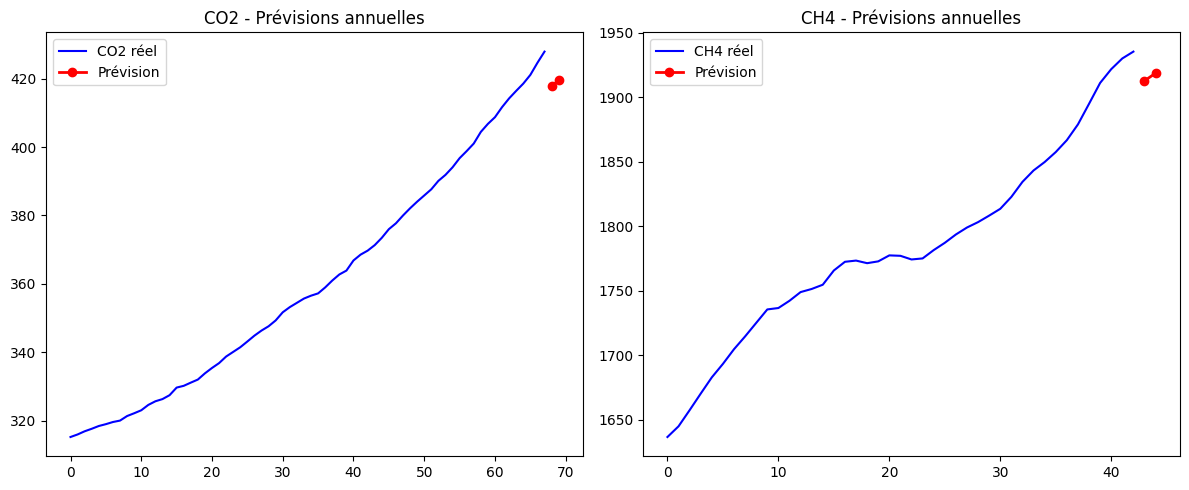

In [193]:
future_annual = np.array([[len(co2_annual)], [len(co2_annual) + 1]])
forecast_co2_2y = model_co2_annual.predict(future_annual)
forecast_ch4_2y = model_ch4_annual.predict(np.array([[len(ch4_annual)], [len(ch4_annual) + 1]]))

print("Prévisions CO2 :")
print(f"Année +1 : {forecast_co2_2y[0]:.2f} ppm")
print(f"Année +2 : {forecast_co2_2y[1]:.2f} ppm")

print("\nPrévisions CH4 :")
print(f"Année +1 : {forecast_ch4_2y[0]:.2f} ppb")
print(f"Année +2 : {forecast_ch4_2y[1]:.2f} ppb")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(co2_annual["average"], 'b-', label="CO2 réel")
ax1.plot([len(co2_annual), len(co2_annual) + 1], forecast_co2_2y, 'ro-', linewidth=2, label="Prévision")
ax1.set_title("CO2 - Prévisions annuelles")
ax1.legend()

ax2.plot(ch4_annual["average"], 'b-', label="CH4 réel")
ax2.plot([len(ch4_annual), len(ch4_annual) + 1], forecast_ch4_2y, 'ro-', linewidth=2, label="Prévision")
ax2.set_title("CH4 - Prévisions annuelles")
ax2.legend()

plt.tight_layout()
plt.show()

## 9.6
Reprendre les trois questions précédentes avec une régression exponentielle. Ce modèle est-il plus pertinent que le modèle linéaire ?

Comparaison des corrélations :
CO2 - Linéaire: 0.989677, Exponentielle: 0.994465
CH4 - Linéaire: 0.974539, Exponentielle: 0.975298


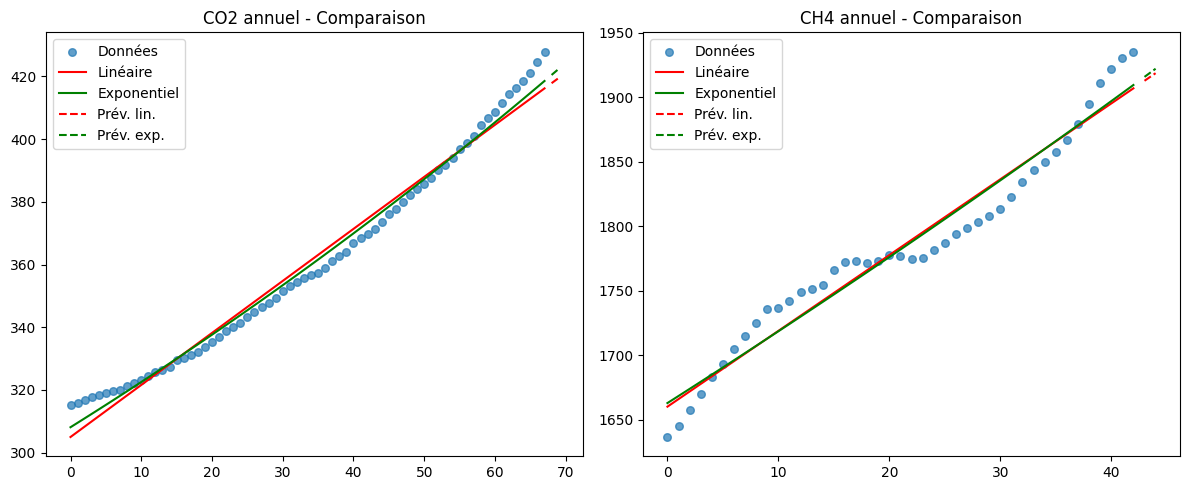


Prévisions exponentielles :
CO2 - Année +1: 420.43 ppm, Année +2: 422.36 ppm
CH4 - Année +1: 1915.73 ppb, Année +2: 1922.05 ppb


In [194]:
log_co2_annual = np.log(co2_annual["average"])
log_ch4_annual = np.log(ch4_annual["average"])

model_exp_co2_annual = LinearRegression().fit(X_co2_annual, log_co2_annual)
model_exp_ch4_annual = LinearRegression().fit(X_ch4_annual, log_ch4_annual)

pred_exp_co2_annual = np.exp(model_exp_co2_annual.predict(X_co2_annual))
pred_exp_ch4_annual = np.exp(model_exp_ch4_annual.predict(X_ch4_annual))

# Corrélations exponentielles
corr_exp_co2_annual, _ = pearsonr(co2_annual["t"], log_co2_annual)
corr_exp_ch4_annual, _ = pearsonr(ch4_annual["t"], log_ch4_annual)

print("Comparaison des corrélations :")
print(f"CO2 - Linéaire: {corr_co2_annual:.6f}, Exponentielle: {corr_exp_co2_annual:.6f}")
print(f"CH4 - Linéaire: {corr_ch4_annual:.6f}, Exponentielle: {corr_exp_ch4_annual:.6f}")

# Prévisions exponentielles
forecast_exp_co2_2y = np.exp(model_exp_co2_annual.predict(future_annual))
forecast_exp_ch4_2y = np.exp(model_exp_ch4_annual.predict(np.array([[len(ch4_annual)], [len(ch4_annual) + 1]])))

# Comparaison visuelle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(co2_annual["t"], co2_annual["average"], s=30, alpha=0.7, label="Données")
ax1.plot(co2_annual["t"], pred_co2_annual, 'r-', label='Linéaire')
ax1.plot(co2_annual["t"], pred_exp_co2_annual, 'g-', label='Exponentiel')
ax1.plot([len(co2_annual), len(co2_annual) + 1], forecast_co2_2y, 'r--', label='Prév. lin.')
ax1.plot([len(co2_annual), len(co2_annual) + 1], forecast_exp_co2_2y, 'g--', label='Prév. exp.')
ax1.set_title("CO2 annuel - Comparaison")
ax1.legend()

ax2.scatter(ch4_annual["t"], ch4_annual["average"], s=30, alpha=0.7, label="Données")
ax2.plot(ch4_annual["t"], pred_ch4_annual, 'r-', label='Linéaire')
ax2.plot(ch4_annual["t"], pred_exp_ch4_annual, 'g-', label='Exponentiel')
ax2.plot([len(ch4_annual), len(ch4_annual) + 1], forecast_ch4_2y, 'r--', label='Prév. lin.')
ax2.plot([len(ch4_annual), len(ch4_annual) + 1], forecast_exp_ch4_2y, 'g--', label='Prév. exp.')
ax2.set_title("CH4 annuel - Comparaison")
ax2.legend()

plt.tight_layout()
plt.show()

print("\nPrévisions exponentielles :")
print(f"CO2 - Année +1: {forecast_exp_co2_2y[0]:.2f} ppm, Année +2: {forecast_exp_co2_2y[1]:.2f} ppm")
print(f"CH4 - Année +1: {forecast_exp_ch4_2y[0]:.2f} ppb, Année +2: {forecast_exp_ch4_2y[1]:.2f} ppb")
